# Bayesian Optimization

Gaussian processes can be utilized as surrogate model in Bayesian optimization, owing to its cheap evaluation. Bayesian optimization tries to find the global maximum/minimum for functions $f$ which cannot be analytically expressed nor we donot know its derivatives. By sampling points based on acquisition functions and then update the posterior of GPs iteratively, the optimal point can be obtained. The acquisition functions make a trade-off between exploration and exploitation. Exploitation means sampling where the surrogate model predicts a high objective and exploration means sampling at locations where the prediction uncertainty is high. Simplified, one is tries to sample the optimal solution currently and the other tries to explore other possibilities.  

References:

http://krasserm.github.io/2018/03/21/bayesian-optimization/

http://codewithzhangyi.com/2018/07/31/Auto%20Hyperparameter%20Tuning%20-%20Bayesian%20Optimization/

https://www.cs.ox.ac.uk/people/nando.defreitas/publications/BayesOptLoop.pdf

https://arxiv.org/pdf/1807.02811.pdf

https://github.com/fmfn/BayesianOptimization

In [18]:
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

In [39]:
def target(x):
    return np.exp(-(x - 2)**2) + np.exp(-(x - 6)**2/10) + 2/ (x**2 + 1) + np.sin(6*x)/2

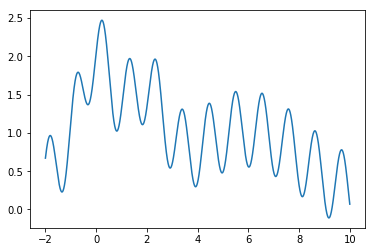

In [51]:
#### ground truth function to be optimized
x = np.linspace(-2, 10, 10000).reshape(-1,1)
y = target(x)

plt.plot(x, y);

In [70]:
optimizer = BayesianOptimization(target, {'x': (-2, 10)}, random_state=27)

In [71]:
optimizer.maximize(init_points=10, n_iter=0, kappa=5)

|   iter    |  target   |     x     |
-------------------------------------
|  1        |  0.8154   |  3.109    |
|  2        |  0.9905   |  7.775    |
|  3        |  0.9224   |  6.825    |
|  4        |  0.7      |  8.416    |
|  5        |  1.322    |  2.601    |
|  6        |  0.7255   |  9.753    |
|  7        |  0.9485   |  8.718    |
|  8        |  1.76     |  0.5166   |
|  9        |  0.6928   |  6.902    |
|  10       |  0.5907   |  5.958    |


In [72]:
print(optimizer.res)

[{'target': 0.815382518827304, 'params': {'x': 3.1086569262267494}}, {'target': 0.9904508083633872, 'params': {'x': 7.7750048859346315}}, {'target': 0.9224290670544036, 'params': {'x': 6.824767482396155}}, {'target': 0.7000135802438167, 'params': {'x': 8.416038398556829}}, {'target': 1.3218764520506976, 'params': {'x': 2.600569274471442}}, {'target': 0.7254814567602353, 'params': {'x': 9.753479585734247}}, {'target': 0.9485341851398648, 'params': {'x': 8.718332160581625}}, {'target': 1.7599490132668758, 'params': {'x': 0.5165820370525052}}, {'target': 0.6928050526336882, 'params': {'x': 6.901931768952888}}, {'target': 0.5906631885155494, 'params': {'x': 5.957719829556915}}]


In [73]:
def posterior(optimizer, x_obs, y_obs, grid):
    optimizer._gp.fit(x_obs, y_obs)

    mu, sigma = optimizer._gp.predict(grid, return_std=True)
    return mu, sigma

In [74]:
def plot_gp(optimizer, x, y):
    fig = plt.figure(figsize=(16, 10))
    steps = len(optimizer.space)
    fig.suptitle(
        'Gaussian Process and Utility Function After {} Steps'.format(steps),
        fontdict={'size':30}
    )
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    axis = plt.subplot(gs[0])
    acq = plt.subplot(gs[1])
    
    x_obs = np.array([[res["params"]["x"]] for res in optimizer.res])
    y_obs = np.array([res["target"] for res in optimizer.res])
    
    mu, sigma = posterior(optimizer, x_obs, y_obs, x)
    axis.plot(x, y, linewidth=3, label='Target')
    axis.plot(x_obs.flatten(), y_obs, 'D', markersize=8, label=u'Observations', color='r')
    axis.plot(x, mu, '--', color='k', label='Prediction')

    axis.fill(np.concatenate([x, x[::-1]]), 
              np.concatenate([mu - 1.9600 * sigma, (mu + 1.9600 * sigma)[::-1]]),
        alpha=.6, fc='c', ec='None', label='95% confidence interval')
    
    axis.set_xlim((-2, 10))
    axis.set_ylim((None, None))
    axis.set_ylabel('f(x)', fontdict={'size':20})
    axis.set_xlabel('x', fontdict={'size':20})
    
    utility_function = UtilityFunction(kind="ucb", kappa=5, xi=0)
    utility = utility_function.utility(x, optimizer._gp, 0)
    acq.plot(x, utility, label='Utility Function', color='purple')
    acq.plot(x[np.argmax(utility)], np.max(utility), '*', markersize=15, 
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((-2, 10))
    acq.set_ylim((0, np.max(utility) + 0.5))
    acq.set_ylabel('Utility', fontdict={'size':20})
    acq.set_xlabel('x', fontdict={'size':20})
    
    axis.legend()
    acq.legend()

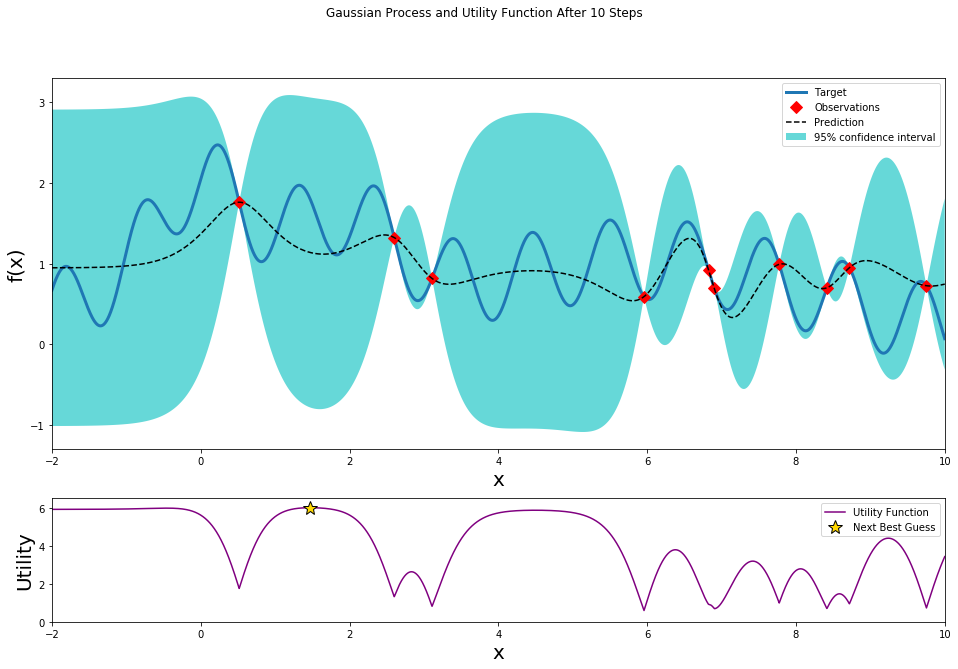

In [75]:
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  11       |  1.795    |  1.473    |


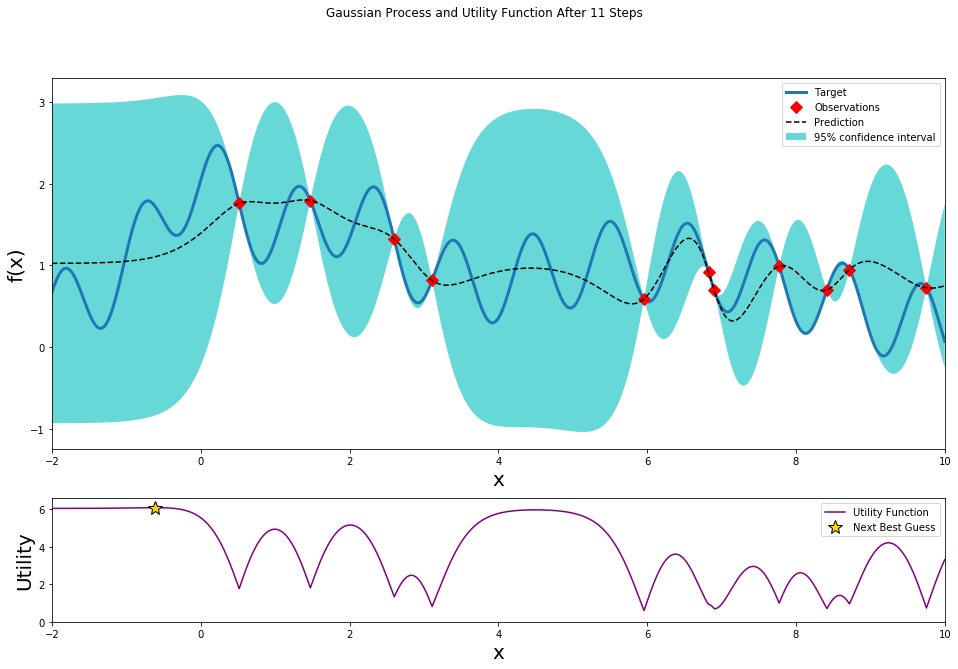

In [76]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  12       |  1.725    | -0.6143   |


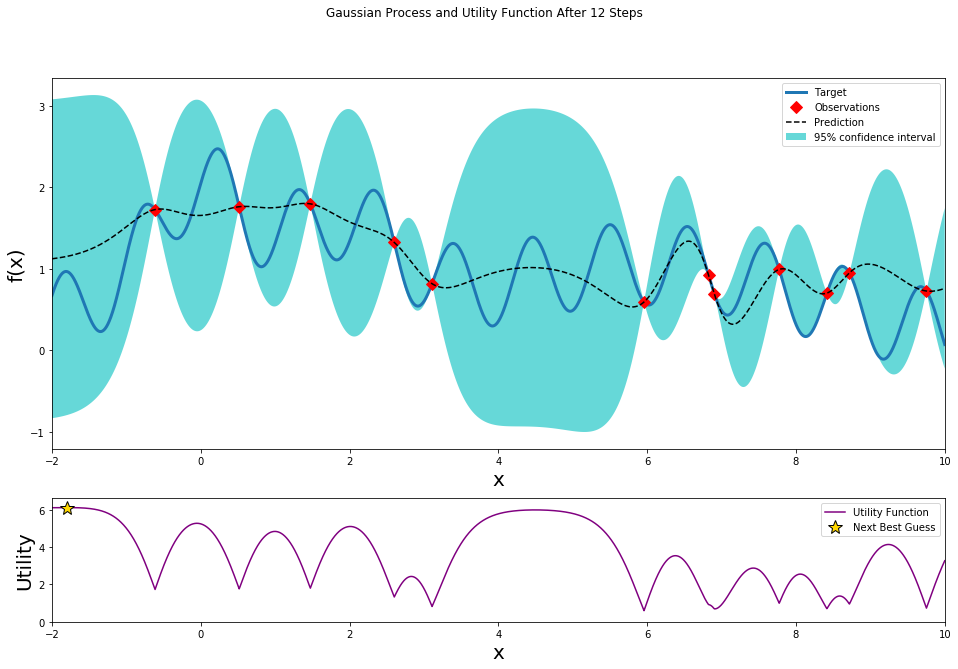

In [77]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  13       |  0.9634   | -1.795    |


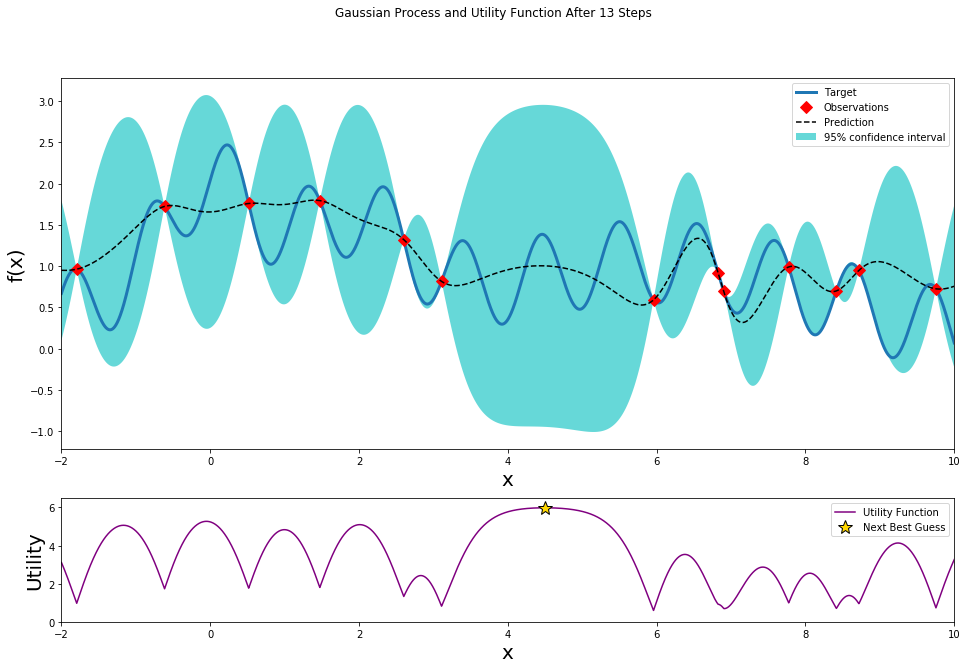

In [78]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  14       |  1.754    |  1.491    |


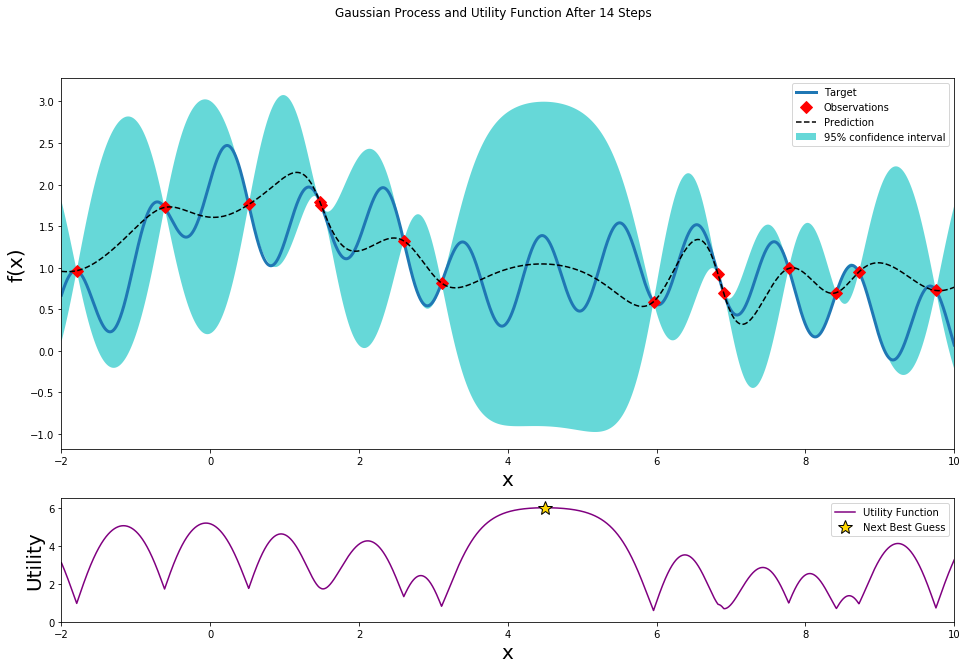

In [79]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  15       |  1.372    |  4.501    |


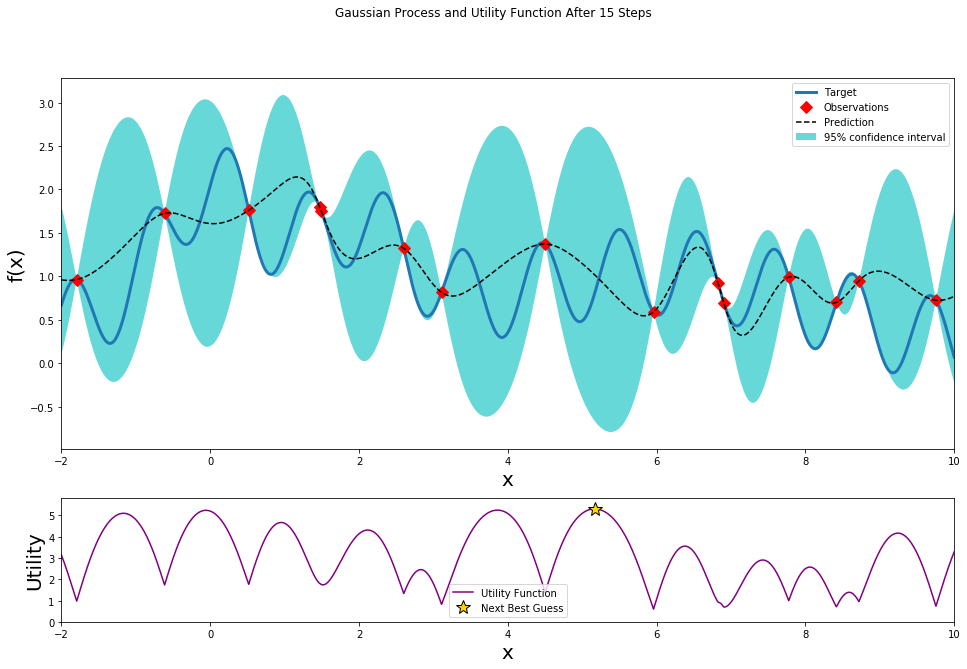

In [80]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  16       |  0.8005   |  5.166    |


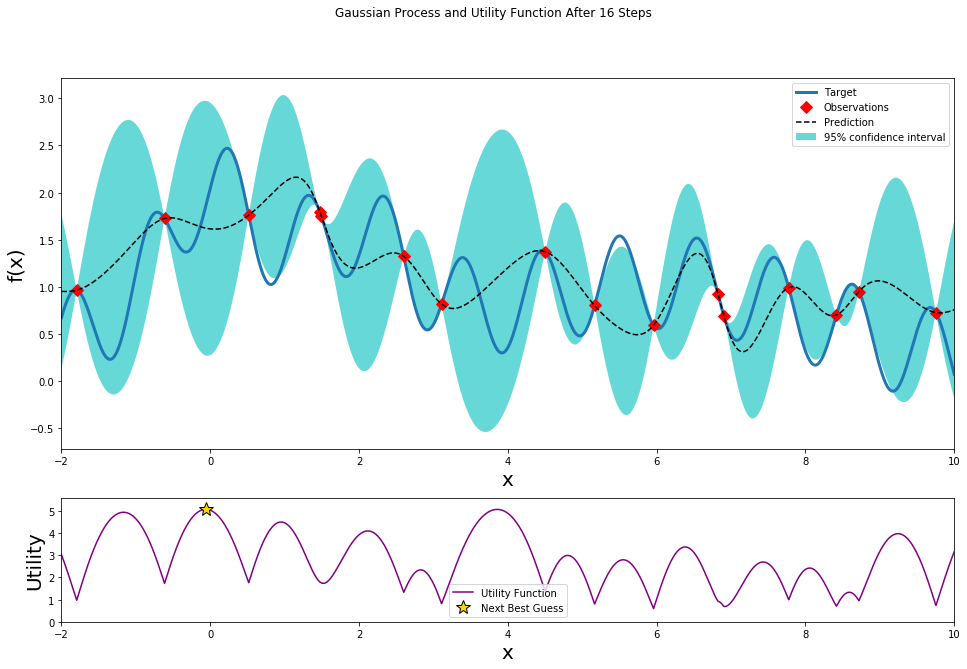

In [81]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  17       |  1.857    | -0.0599   |


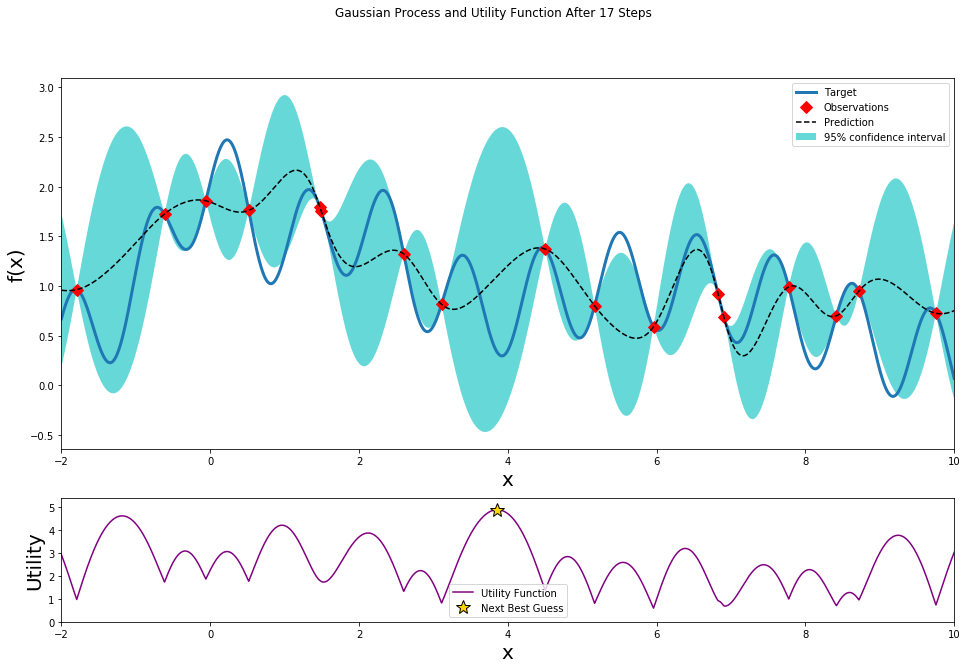

In [82]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  18       |  0.3312   |  3.859    |


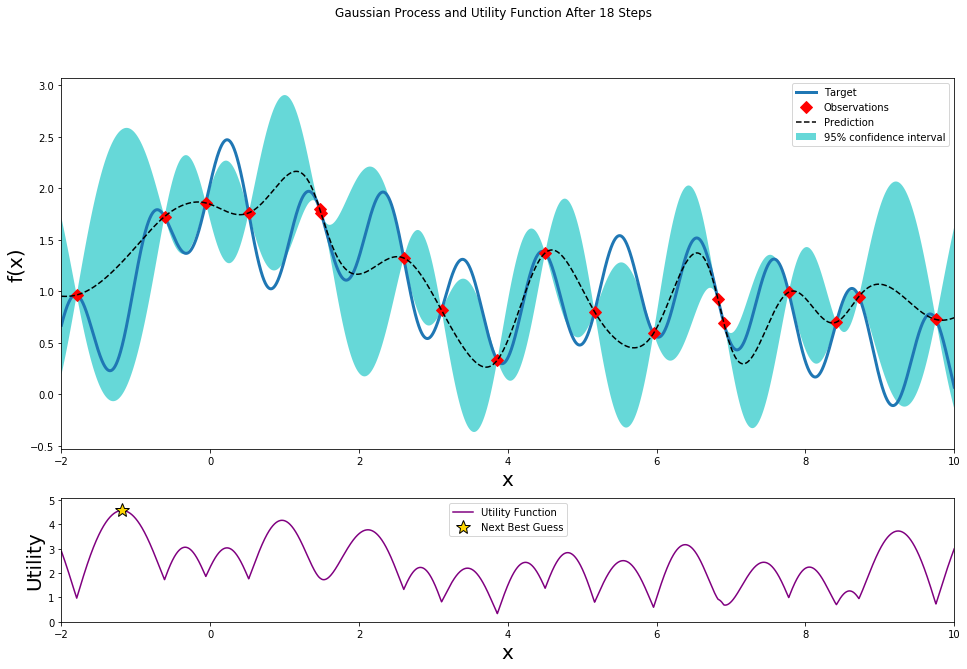

In [83]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  19       |  0.4711   | -1.185    |


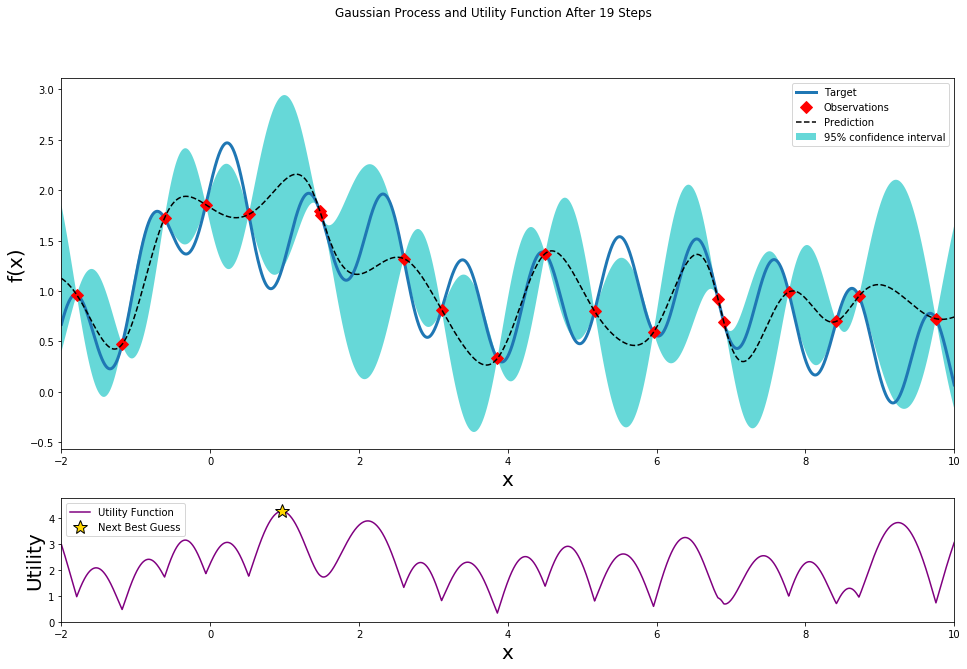

In [84]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  20       |  1.216    |  0.9629   |


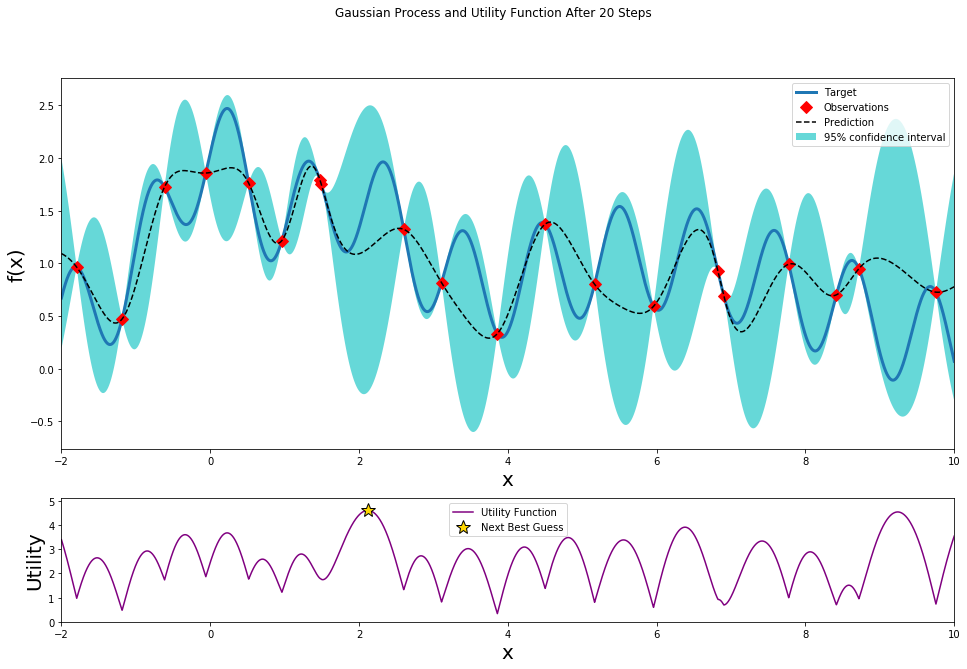

In [85]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  21       |  1.642    |  2.118    |


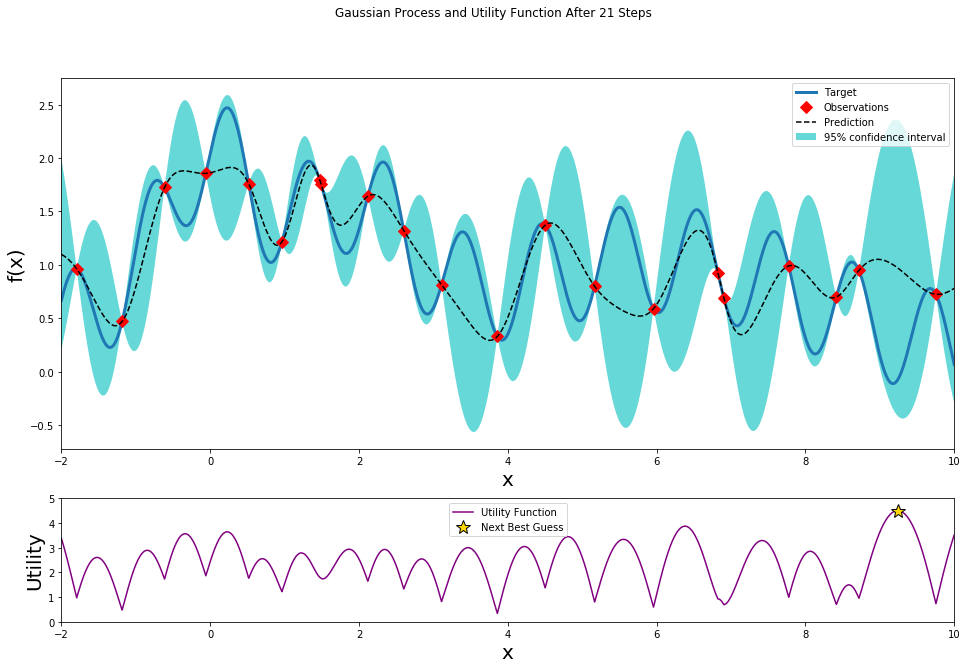

In [86]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

|   iter    |  target   |     x     |
-------------------------------------
|  22       | -0.07413  |  9.24     |


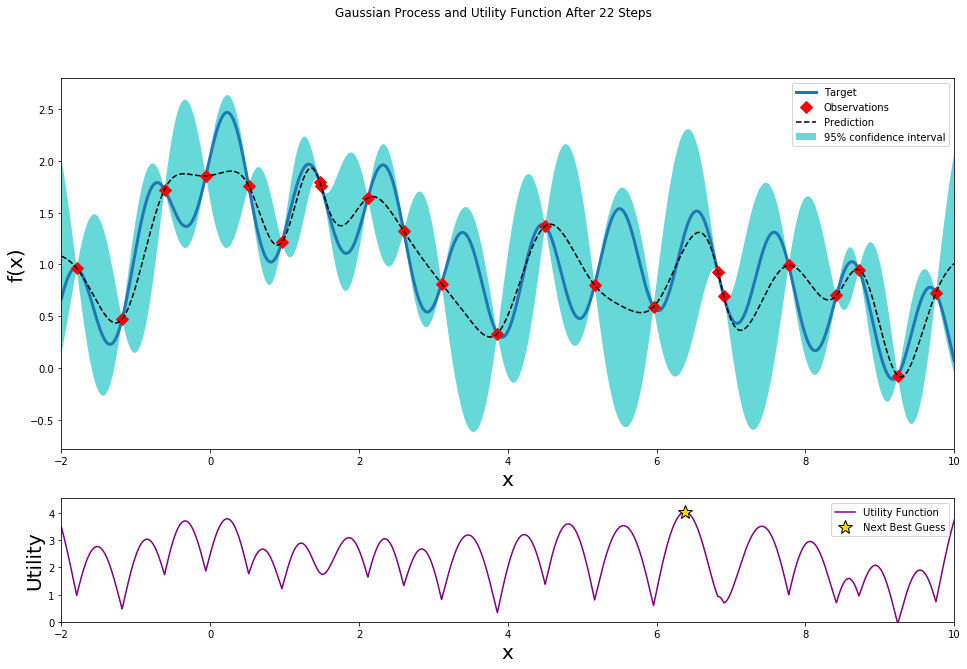

In [87]:
optimizer.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(optimizer, x, y)

In [88]:
print(optimizer.res)

[{'target': 0.815382518827304, 'params': {'x': 3.1086569262267494}}, {'target': 0.9904508083633872, 'params': {'x': 7.7750048859346315}}, {'target': 0.9224290670544036, 'params': {'x': 6.824767482396155}}, {'target': 0.7000135802438167, 'params': {'x': 8.416038398556829}}, {'target': 1.3218764520506976, 'params': {'x': 2.600569274471442}}, {'target': 0.7254814567602353, 'params': {'x': 9.753479585734247}}, {'target': 0.9485341851398648, 'params': {'x': 8.718332160581625}}, {'target': 1.7599490132668758, 'params': {'x': 0.5165820370525052}}, {'target': 0.6928050526336882, 'params': {'x': 6.901931768952888}}, {'target': 0.5906631885155494, 'params': {'x': 5.957719829556915}}, {'target': 1.7950037712632503, 'params': {'x': 1.4725954665873389}}, {'target': 1.7245670203237236, 'params': {'x': -0.6142864830698453}}, {'target': 0.96342957120265, 'params': {'x': -1.7953550837943302}}, {'target': 1.7543835933833867, 'params': {'x': 1.4906468451247785}}, {'target': 1.3717103404955082, 'params': 